In [1]:
import glob
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras import utils, losses, optimizers
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D

SEED = 2017

Using TensorFlow backend.


In [2]:
# Specify data directory and extract all file names for both classes
DATA_DIR = 'Data/PetImages/'
cats = glob.glob(DATA_DIR + "Cat/*.jpg")
dogs = glob.glob(DATA_DIR + "Dog/*.jpg")

print('#Cats: {}, #Dogs: {}'.format(len(cats), len(dogs)))
# #Cats: 12500, #Dogs: 12500

#Cats: 12500, #Dogs: 12500


In [3]:
dogs_train, dogs_val, cats_train, cats_val = train_test_split(dogs, cats, test_size=0.2, random_state=SEED)

In [4]:
def batchgen(cats, dogs, batch_size, img_size=50):
    # Create empty numpy arrays
    batch_images = np.zeros((batch_size, img_size, img_size, 3))
    batch_label = np.zeros(batch_size)

    # Custom batch generator 
    while 1:
        n = 0
        while n < batch_size:
            # Randomly pick a dog or cat image
            if np.random.randint(2) == 1:
                i = np.random.randint(len(dogs))
                img = cv2.imread(dogs[i])
                if img is None:
                    break
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # The images have different dimensions, we resize all to 100x100
                img = cv2.resize(img, (img_size, img_size), interpolation = cv2.INTER_AREA)
                y = 1

            else:
                i = np.random.randint(len(cats))
                img = cv2.imread(cats[i])
                if img is None:
                    break
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (img_size, img_size), interpolation = cv2.INTER_AREA)
                y = 0
        
            batch_images[n] = img
            batch_label[n] = y
            n+=1
        yield batch_images, batch_label

In [5]:
def create_model(init_type='xavier', img_size=100):
    # Define architecture
    model = Sequential()
    model.add(Lambda(lambda x: (x / 255.) - 0.5, input_shape=(img_size, img_size, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=init_type))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=init_type))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=init_type))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=init_type))

    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
 
    sgd = optimizers.Adam()
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['binary_accuracy'])
 
    return model

In [6]:
models = []
for init_type in ['random_uniform', 'glorot_normal', 'glorot_uniform', 'lecun_uniform', 'he_uniform']:
    model = create_model(init_type, img_size=50)
    models.append(dict({'setting': '{}'.format(init_type), 
            'model': model
            }))

In [7]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy', patience=3)]

In [8]:
batch_size = 512
n_epochs = 500
steps_per_epoch = 100
validation_steps = round((len(dogs_val)+len(cats_val))/batch_size)

train_generator = batchgen(dogs_train, cats_train, batch_size)
val_generator = batchgen(dogs_val, cats_val, batch_size)

history = []
for i in range(len(models)):
    print(models[i])
    history.append(
        models[i]['model'].
        fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=n_epochs, validation_data=val_generator, validation_steps=validation_steps, callbacks=callbacks)
    )

{'setting': 'random_uniform', 'model': <keras.models.Sequential object at 0x7f5cc1ccf710>}
Epoch 1/500
100/100 [==============================] - 126s - loss: 0.6334 - binary_accuracy: 0.6326 - val_loss: 1.1223 - val_binary_accuracy: 0.5881
Epoch 2/500
100/100 [==============================] - 109s - loss: 0.5522 - binary_accuracy: 0.7170 - val_loss: 0.5319 - val_binary_accuracy: 0.7408
Epoch 3/500
100/100 [==============================] - 142s - loss: 0.5015 - binary_accuracy: 0.7578 - val_loss: 0.4635 - val_binary_accuracy: 0.7779
Epoch 4/500
100/100 [==============================] - 125s - loss: 0.4624 - binary_accuracy: 0.7848 - val_loss: 0.4920 - val_binary_accuracy: 0.7605
Epoch 5/500
100/100 [==============================] - 113s - loss: 0.4295 - binary_accuracy: 0.8039 - val_loss: 0.4279 - val_binary_accuracy: 0.8125
Epoch 6/500
100/100 [==============================] - 121s - loss: 0.4064 - binary_accuracy: 0.8152 - val_loss: 0.3857 - val_binary_accuracy: 0.8141
Epoch 7/5

100/100 [==============================] - 118s - loss: 0.1821 - binary_accuracy: 0.9301 - val_loss: 0.4035 - val_binary_accuracy: 0.8682
Epoch 19/500
100/100 [==============================] - 108s - loss: 0.1678 - binary_accuracy: 0.9345 - val_loss: 0.3430 - val_binary_accuracy: 0.8717
Epoch 20/500
100/100 [==============================] - 105s - loss: 0.1614 - binary_accuracy: 0.9383 - val_loss: 0.3246 - val_binary_accuracy: 0.8824
Epoch 21/500
100/100 [==============================] - 118s - loss: 0.1587 - binary_accuracy: 0.9372 - val_loss: 0.3439 - val_binary_accuracy: 0.8828
Epoch 22/500
100/100 [==============================] - 122s - loss: 0.1561 - binary_accuracy: 0.9387 - val_loss: 0.3505 - val_binary_accuracy: 0.8867
Epoch 23/500
100/100 [==============================] - 117s - loss: 0.1395 - binary_accuracy: 0.9456 - val_loss: 0.3704 - val_binary_accuracy: 0.8875
Epoch 24/500
100/100 [==============================] - 110s - loss: 0.1389 - binary_accuracy: 0.9479 - val

100/100 [==============================] - 112s - loss: 0.4119 - binary_accuracy: 0.8040 - val_loss: 0.3649 - val_binary_accuracy: 0.8432
Epoch 13/500
100/100 [==============================] - 107s - loss: 0.4046 - binary_accuracy: 0.8090 - val_loss: 0.3374 - val_binary_accuracy: 0.8510
Epoch 14/500
100/100 [==============================] - 110s - loss: 0.3985 - binary_accuracy: 0.8105 - val_loss: 0.3448 - val_binary_accuracy: 0.8570
Epoch 15/500
100/100 [==============================] - 110s - loss: 0.3858 - binary_accuracy: 0.8161 - val_loss: 0.3147 - val_binary_accuracy: 0.8629
Epoch 16/500
100/100 [==============================] - 124s - loss: 0.3728 - binary_accuracy: 0.8230 - val_loss: 0.3706 - val_binary_accuracy: 0.8488
Epoch 17/500
100/100 [==============================] - 119s - loss: 0.3684 - binary_accuracy: 0.8261 - val_loss: 0.3362 - val_binary_accuracy: 0.8631
Epoch 18/500
100/100 [==============================] - 106s - loss: 0.3601 - binary_accuracy: 0.8285 - val

Max accuracy model random_uniform: 0.88671875
Max accuracy model glorot_normal: 0.872265625
Max accuracy model glorot_uniform: 0.8875
Max accuracy model lecun_uniform: 0.8890625
Max accuracy model he_uniform: 0.8775390625


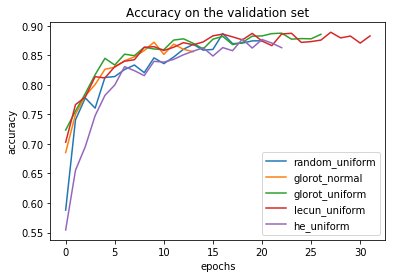

In [10]:
for i in range(len(models)):
    plt.plot(range(len(history[i].history['val_binary_accuracy'])), history[i].history['val_binary_accuracy'], label=models[i]['setting'])
    print('Max accuracy model {}: {}'.format(models[i]['setting'], max(history[i].history['val_binary_accuracy'])))
plt.title('Accuracy on the validation set')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()